<a href="https://colab.research.google.com/github/laiyungseng/Salary-Prediction/blob/main/Employee_data_(classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

This project is to predict the salary of the employee based on the employee dataset. The dataset was designed with the regression problem and included realistic employee attributes with logically consistent relationships between features such as  education level, job title, experience, and salary.

In this project will be using multiple regression machine model to student the dataset and search for the most suitable model for this prediction issus.

Addtionally, will also include fine tuning for machine learning to examinate the potential of the model.

#import kaggle and connect google drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#verify is there .kaggle file path in root if not create one
!ls ~/.kaggle


ls: cannot access '/root/.kaggle': No such file or directory


In [7]:
#create ~/.kaggle
!mkdir ~/.kaggle

In [8]:
#copy kaggle json to kaggle root file
!cp /content/drive/MyDrive/KaggleAPI/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

##download dataset from kaggle

In [9]:
!kaggle datasets download -d gmudit/employer-data

Dataset URL: https://www.kaggle.com/datasets/gmudit/employer-data
License(s): MIT
  0% 0.00/163k [00:00<?, ?B/s]
100% 163k/163k [00:00<00:00, 376MB/s]


In [10]:
!unzip /content/employer-data.zip

Archive:  /content/employer-data.zip
  inflating: Employers_data.csv      


#import library

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [12]:
df = pd.read_csv('/content/Employers_data.csv')

In [13]:
df.describe()

,Employee_ID,Age,Experience_Years,Salary
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,35.455900,12.370900,115381.500000
std,2886.89568,10.000213,9.148951,46066.139047
min,1.00000,21.000000,0.000000,25000.000000
25%,2500.75000,27.000000,5.000000,70000.000000
50%,5000.50000,34.000000,10.000000,120000.000000
75%,7500.25000,43.000000,19.000000,150000.000000
max,10000.00000,60.000000,37.000000,215000.000000


In [14]:
df.columns

Index(['Employee_ID', 'Name', 'Age', 'Gender', 'Department', 'Job_Title',
       'Experience_Years', 'Education_Level', 'Location', 'Salary'],
      dtype='object')

In [15]:
#drop unrelevant variable
#Employee_ID and Name
df.drop(['Employee_ID','Name'], axis=1, inplace=True)
df.columns

Index(['Age', 'Gender', 'Department', 'Job_Title', 'Experience_Years',
       'Education_Level', 'Location', 'Salary'],
      dtype='object')

In [16]:
#check variable type
df.dtypes

,0
Age,int64
Gender,object
Department,object
Job_Title,object
Experience_Years,int64
Education_Level,object
Location,object
Salary,int64


In [17]:
#labelEncoder
le = LabelEncoder()
for emt in df.columns:
  if df[emt].dtype == 'object':
    df[f'{emt}_c'] =  le.fit_transform(df[emt])

In [18]:
#drop unnecessary variable for correlation calculation
df_new = df.drop(columns=['Gender', 'Department', 'Job_Title', 'Education_Level', 'Location'],axis=1)

In [19]:
df_new

,Age,Experience_Years,Salary,Gender_c,Department_c,Job_Title_c,Education_Level_c,Location_c
0,24,1,90000,0,0,1,1,0
1,56,33,195000,1,5,2,1,4
2,21,1,35000,1,0,3,0,2
3,30,9,75000,1,1,0,0,2
4,25,2,70000,0,2,0,1,4
...,...,...,...,...,...,...,...,...
9995,51,28,185000,1,5,2,1,0
9996,36,9,165000,0,5,2,2,3
9997,57,30,200000,1,5,2,2,2
9998,37,14,135000,0,0,4,1,2


<Axes: >

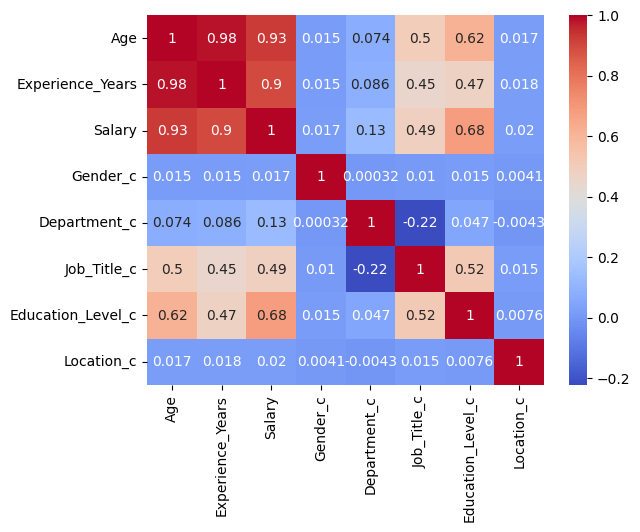

In [20]:
df_new_corr=df.corr(numeric_only=True)
sns.heatmap(df_new_corr, annot=True, cmap='coolwarm')

In [21]:
#filter out correlation that are more than 0.5 and less than 1
df_corr_filter=df_new_corr['Salary'][(df_new_corr['Salary'].abs() > 0.5) & (df_new_corr['Salary'].abs()<1)]
df_corr_filter

,Salary
Age,0.927958
Experience_Years,0.898025
Education_Level_c,0.681441


The table above show the relationship of the variable to the salary. Age, Experience_Years and Education_level has strong relationship with salary variable. Hence, this shows that this 3 variables will be highly impact in model training.

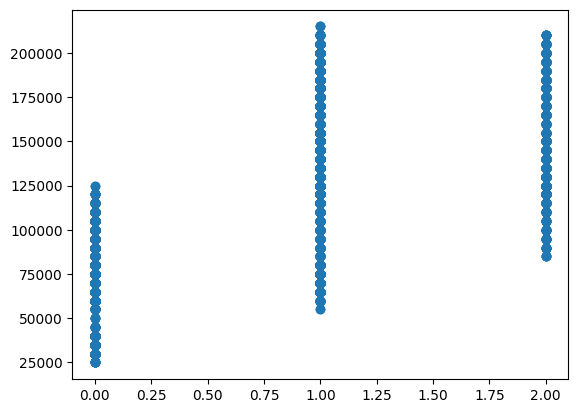

In [22]:
plt.scatter(df_new['Education_Level_c'], df_new['Salary'])

#import linear regression model

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error, mean_squared_error

In [102]:
#split dataset into train and test
X= df.drop(columns=['Gender', 'Department', 'Job_Title', 'Education_Level', 'Location','Salary'], axis=1)
y= df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [103]:
# 20% ratio of 10,000 dataset
X_train.shape, X_test.shape

((8000, 7), (2000, 7))

In [144]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [145]:
y_pred[:5], y_test[:5]

(array([139017.33811286,  98336.56338289,  64074.40959668, 117659.74663558,
        149608.53722804]),
 6252    135000
 4684     70000
 1731     65000
 4742    125000
 4521    140000
 Name: Salary, dtype: int64)

In [106]:
#metrics Evaluation
metrics = {
    'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
    'mse': mean_squared_error(y_test, y_pred),
    'r2_score': r2_score(y_test,y_pred)
}
metrics

{'rmse': np.float64(14708.236865707553),
 'mse': 216332231.69775876,
 'r2_score': 0.8973591437624894}

In [146]:
y_pred.shape, y_test.shape

((2000,), (2000,))

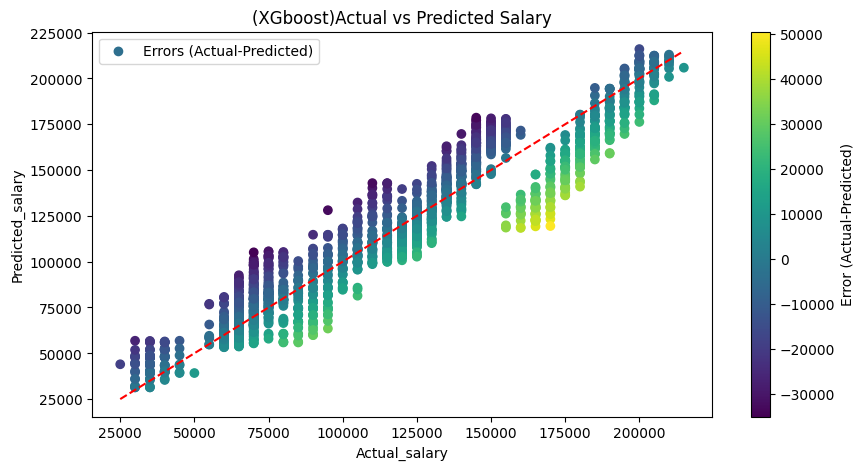

In [147]:
#Error plot for actual vs prediction
plt.figure(figsize=(10,5))

errors = y_test - y_pred
sc=plt.scatter(y_test,y_pred, c=errors,cmap='viridis', label="Errors (Actual-Predicted)")
plt.plot((min(y_test),max(y_test)),(min(y_test),max(y_test)), 'r--')

plt.xlabel('Actual_salary')
plt.ylabel('Predicted_salary')
plt.title('(XGboost)Actual vs Predicted Salary')
plt.colorbar(sc,label="Error (Actual-Predicted)")
plt.legend()



In [108]:
df['Department'].unique()

array(['Engineering', 'Sales', 'Finance', 'HR', 'Marketing', 'Product'],
      dtype=object)

In [109]:
df['Location'].unique()

array(['Austin', 'Seattle', 'New York', 'San Francisco', 'Chicago'],
      dtype=object)

In [110]:
new_Test = pd.DataFrame([{'Age': 25, 'Experience_Years':10, 'Gender':'Female', 'Department':'Engineering', 'Job_Title':'Engineer', 'Education_Level':'Bachelor', 'Location':'New York'}])

In [111]:
#create new dataset
for e in new_Test.columns:
  if new_Test[e].dtype == 'object':
    le.fit(df[f'{e}'])
    new_Test[f'{e}_c']=le.transform(new_Test[f'{e}'])

In [112]:
new_Test

,Age,Experience_Years,Gender,Department,Job_Title,Education_Level,Location,Gender_c,Department_c,Job_Title_c,Education_Level_c,Location_c
0,25,10,Female,Engineering,Engineer,Bachelor,New York,0,0,1,0,2


In [113]:
y_pred = model.predict(new_Test.drop(columns=['Gender', 'Department', 'Job_Title', 'Education_Level', 'Location']))

In [114]:
df['Job_Title'].unique()

array(['Engineer', 'Executive', 'Intern', 'Analyst', 'Manager'],
      dtype=object)

In [36]:
y_pred

array([109932.92241383])

In [37]:
testfilter=df[(df['Department_c'].values==new_Test['Department_c'].values) & (df['Education_Level_c'].values==new_Test['Education_Level_c'].values)\
   & (df['Job_Title_c'].values==new_Test['Job_Title_c'].values)\
   & (df['Location_c'].values==new_Test['Location_c'].values)\
   & (df['Gender_c'].values==new_Test['Gender_c'].values)]

In [38]:
testfilter

,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary,Gender_c,Department_c,Job_Title_c,Education_Level_c,Location_c
1424,24,Female,Engineering,Engineer,3,Bachelor,New York,90000,0,0,1,0,2
2051,38,Female,Engineering,Engineer,17,Bachelor,New York,115000,0,0,1,0,2
2340,23,Female,Engineering,Engineer,2,Bachelor,New York,80000,0,0,1,0,2
2480,30,Female,Engineering,Engineer,9,Bachelor,New York,90000,0,0,1,0,2
2980,35,Female,Engineering,Engineer,14,Bachelor,New York,110000,0,0,1,0,2
3824,37,Female,Engineering,Engineer,16,Bachelor,New York,110000,0,0,1,0,2
4744,33,Female,Engineering,Engineer,12,Bachelor,New York,105000,0,0,1,0,2
4800,27,Female,Engineering,Engineer,6,Bachelor,New York,90000,0,0,1,0,2
4896,34,Female,Engineering,Engineer,13,Bachelor,New York,95000,0,0,1,0,2
5859,28,Female,Engineering,Engineer,7,Bachelor,New York,90000,0,0,1,0,2


In [39]:
testfilter['Salary'].mean()

np.float64(100208.33333333333)

The result shown from linear regression are clearly having a large gap. according to the original dataset, by narrow down the search range to same as data that test in the model. the observation shows that non of the engineer with 10 years experience, with bachelor education level are getting 109932.9 as Salary. However, the average salary from the filtered data are 100208.

the RSME generated from the model is around 14708 which indicate the difference between original value and the R2_score is 0.89. this shows that linear regress alone might not able to distinct pattern within the dataset due to the variable is not linearly affected on the target.

##Random Forest Regression

In [115]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(
    n_estimators=400,
    random_state=42,
    max_depth=5,

)
RF.fit(X_train,y_train)
y_rfpred=RF.predict(X_test)

In [116]:
metricsRF = {
    'rmse': np.sqrt(mean_squared_error(y_test, y_rfpred)),
    'mse': mean_squared_error(y_test, y_rfpred),
    'r2_score': r2_score(y_test,y_rfpred)
}
metricsRF

{'rmse': np.float64(4386.160676282737),
 'mse': 19238405.478169035,
 'r2_score': 0.9908721580902355}

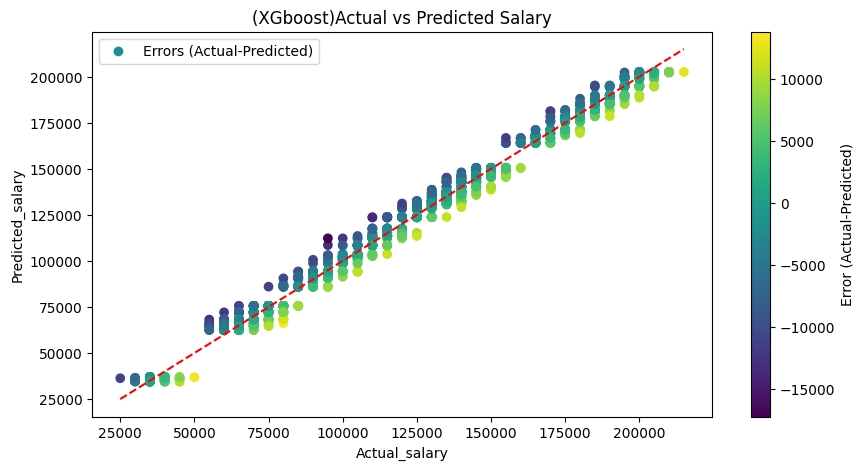

In [148]:
#Error (Actual and Prediction)
plt.figure(figsize=(10,5))

errors = y_test - y_rfpred
sc=plt.scatter(y_test,y_rfpred, c=errors,cmap='viridis', label="Errors (Actual-Predicted)")
plt.plot((min(y_test),max(y_test)),(min(y_test),max(y_test)), 'r--')

plt.xlabel('Actual_salary')
plt.ylabel('Predicted_salary')
plt.title('(XGboost)Actual vs Predicted Salary')
plt.colorbar(sc,label="Error (Actual-Predicted)")
plt.legend()



##GridSearchCV optimizationon random forest regression

In [117]:
param_grid={
    'max_depth': [3,5,7],
    'n_estimators': [200, 400, 600],
    'max_depth': [3, 5, 7]
}
RFmodel1 = RandomForestRegressor()
gridsearch = GridSearchCV(RFmodel1, param_grid, cv=KFold(n_splits=5,shuffle=True), scoring='r2')
gridsearch.fit(X_train, y_train)

print("Best set of hyperparameters:", gridsearch.best_params_)
print("Best score:", gridsearch.best_score_)

Best set of hyperparameters: {'max_depth': 7, 'n_estimators': 400}
Best score: 0.9910126281332454


In [118]:
RFopt=RandomForestRegressor(
    n_estimators=gridsearch.best_params_['n_estimators'],
    random_state=42,
    max_depth=gridsearch.best_params_['max_depth'],
)
RFopt.fit(X_train, y_train)
y_rfoptpred = RFopt.predict(X_test)

In [119]:
metricsRFopt = {
    'rmse': np.sqrt(mean_squared_error(y_test, y_rfoptpred)),
    'mse': mean_squared_error(y_test, y_rfoptpred),
    'r2_score': r2_score(y_test,y_rfoptpred)
}
metricsRFopt

{'rmse': np.float64(4284.39795932228),
 'mse': 18356065.873844918,
 'r2_score': 0.9912907923906786}

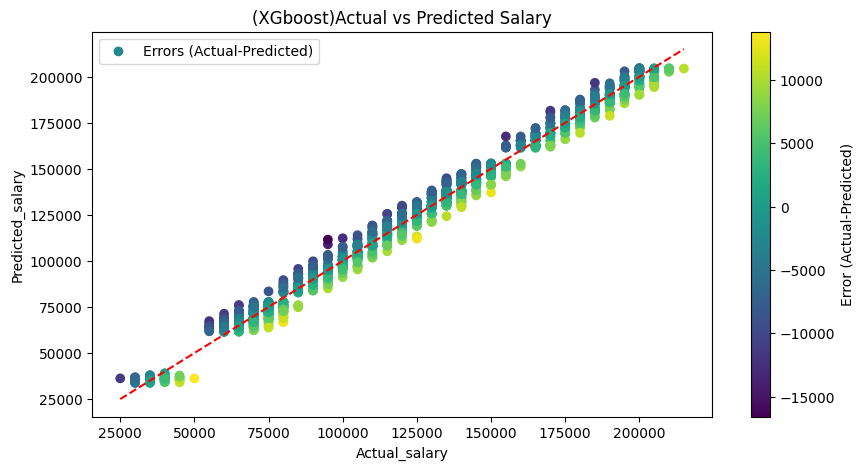

In [149]:
plt.figure(figsize=(10,5))

errors = y_test - y_rfoptpred
sc=plt.scatter(y_test,y_rfoptpred, c=errors,cmap='viridis', label="Errors (Actual-Predicted)")
plt.plot((min(y_test),max(y_test)),(min(y_test),max(y_test)), 'r--')

plt.xlabel('Actual_salary')
plt.ylabel('Predicted_salary')
plt.title('(XGboost)Actual vs Predicted Salary')
plt.colorbar(sc,label="Error (Actual-Predicted)")
plt.legend()



##XGBoost regression

In [4]:
from xgboost import XGBRegressor

In [45]:
XGmodel=XGBRegressor(
    n_estimators=400,
    random_state=42,
    max_depth=5,
)
XGmodel.fit(X_train,y_train)
y_XGpred=XGmodel.predict(X_test)

In [120]:
metricsXGB = {
    'rmse': np.sqrt(mean_squared_error(y_test, y_XGpred)),
    'mse': mean_squared_error(y_test, y_XGpred),
    'r2_score': r2_score(y_test,y_XGpred)
}
metricsXGB

{'rmse': np.float64(4688.966410628253),
 'mse': 21986406.0,
 'r2_score': 0.9895683526992798}

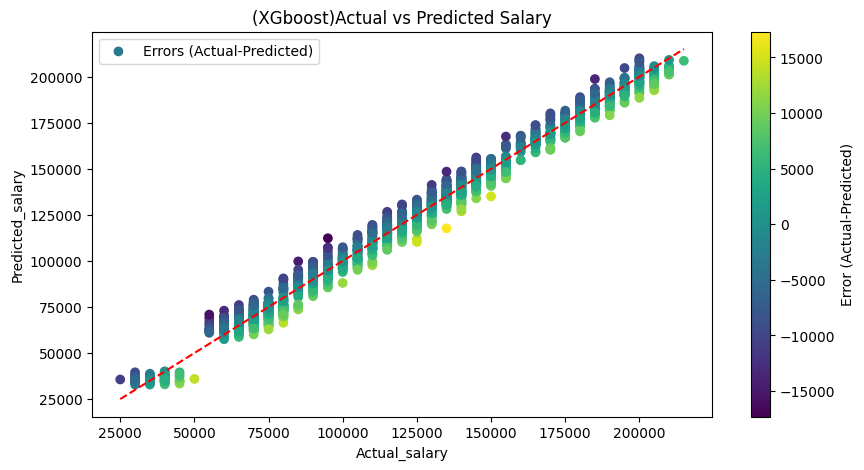

In [150]:
plt.figure(figsize=(10,5))

errors = y_test - y_XGpred
sc=plt.scatter(y_test,y_XGpred, c=errors,cmap='viridis', label="Errors (Actual-Predicted)")
plt.plot((min(y_test),max(y_test)),(min(y_test),max(y_test)), 'r--')

plt.xlabel('Actual_salary')
plt.ylabel('Predicted_salary')
plt.title('(XGboost)Actual vs Predicted Salary')
plt.colorbar(sc,label="Error (Actual-Predicted)")
plt.legend()



##GridSearchCV optimization on XGBoost

In [55]:
from sklearn.model_selection import GridSearchCV, KFold


In [122]:
param_grid={
    'max_depth': [3,5,7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1],
    'n_estimators': [200, 400, 600],
    'max_depth': [3, 5, 7]
}
XGmodel1 = XGBRegressor()
gridsearch = GridSearchCV(XGmodel1, param_grid, cv=KFold(n_splits=5,shuffle=True), scoring='r2')
gridsearch.fit(X_train, y_train)

print("Best set of hyperparameters:", gridsearch.best_params_)
print("Best score:", gridsearch.best_score_)

Best set of hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 600, 'subsample': 0.5}
Best score: 0.9911662817001343


In [123]:
XGmodel_opt=XGBRegressor(
    n_estimators=gridsearch.best_params_['n_estimators'],
    random_state=42,
    max_depth=gridsearch.best_params_['max_depth'],
    learning_rate=gridsearch.best_params_['learning_rate'],
    subsample=gridsearch.best_params_['subsample']
)
XGmodel_opt.fit(X_train,y_train)
y_XGoptpred=XGmodel_opt.predict(X_test)

In [124]:
metricsXGBopt = {
    'rmse': np.sqrt(mean_squared_error(y_test, y_XGoptpred)),
    'mse': mean_squared_error(y_test, y_XGoptpred),
    'r2_score': r2_score(y_test,y_XGoptpred)
}
metricsXGBopt

{'rmse': np.float64(4242.212865946262),
 'mse': 17996370.0,
 'r2_score': 0.991461455821991}

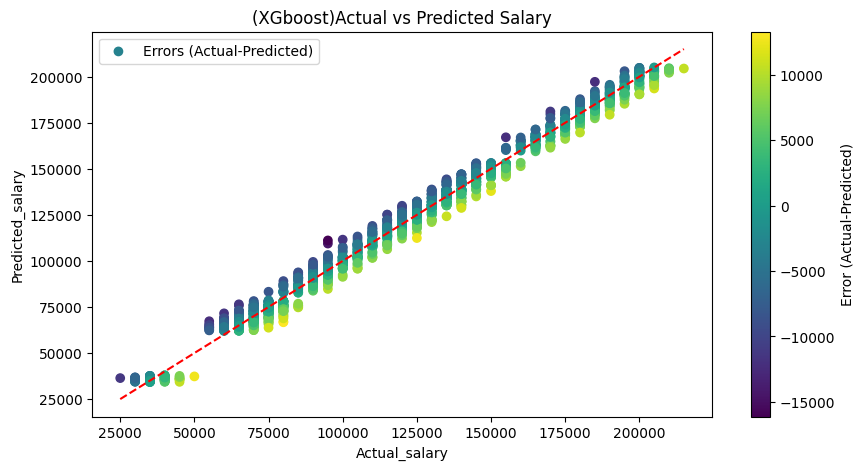

In [89]:
plt.figure(figsize=(10,5))

errors = y_test - y_XGoptpred
sc=plt.scatter(y_test,y_XGoptpred, c=errors,cmap='viridis', label="Errors (Actual-Predicted)")
plt.plot((min(y_test),max(y_test)),(min(y_test),max(y_test)), 'r--')

plt.xlabel('Actual_salary')
plt.ylabel('Predicted_salary')
plt.title('(XGboost)Actual vs Predicted Salary')
plt.colorbar(sc,label="Error (Actual-Predicted)")
plt.legend()



plt.show()

from the figure plot, shows that the erorrs between actual data and predicted data are moderate margin different. most of the point are close the linear line. This shows that a strong relation are discover between actual and predict value. furthermore, we also see some outlier in the figure. However, this does not affect the accuracy.

#Evaluation Metrics table

In [139]:
Evaluation_metrics = {
    'Model': ['Linear Regression','Random Forest Regression','Random_Forest_Regression(OPT)', 'XGBoost_Regression', 'XGBoost_Regression(OPT)'],
    'RMSE': [metrics['rmse'], metricsRF['rmse'], metricsRFopt['rmse'], metricsXGB['rmse'], metricsXGBopt['rmse']],
    'MSE': [metrics['mse'], metricsRF['mse'], metricsRFopt['mse'], metricsXGB['mse'], metricsXGBopt['mse']],
    'R2_score': [metrics['r2_score'], metricsRF['r2_score'], metricsRFopt['r2_score'], metricsXGB['r2_score'], metricsXGBopt['r2_score']]
}

EM= pd.DataFrame(Evaluation_metrics)
EM= EM.set_index('Model')
EM=EM.style.set_caption('Model Evaluation Metrics').format("{:.3f}")
EM=EM.set_table_styles([
    {'selector': 'th', 'props':[('text-align', 'left')]},
    {'selector': 'td', 'props':[('text-align', 'center')]},
    {'selector': 'caption', 'props':[('font-size', '18px'),
                                     ('font-weight', 'bold')]}
])
EM

,RMSE,MSE,R2_score
Model,,,
Linear Regression,14708.237,216332231.698,0.897
Random Forest Regression,4386.161,19238405.478,0.991
Random_Forest_Regression(OPT),4284.398,18356065.874,0.991
XGBoost_Regression,4688.966,21986406.000,0.990
XGBoost_Regression(OPT),4242.213,17996370.000,0.991


Based on the Model Evaluation Metrics, the result from Random forest and XGBoost shows a very high R2_score with a value of 0.99. This indicate a very strong predictive accurancy from these models. Furthermore, by comparing both models, XGBoost_Regression(OPT) has the lowest RMSE which has the value of 4242, This indicate that the predicted value are varied by 4242 to the original value.

Next, based on the results we can understand Linear Regression is not good at handle variable that are less direct relationship. However Random Forest Regression and XGBoost did well in learning trait in dataset. With grdsearchCV applied, both regression model were able observe slight imporve in RMSE, MSE, R2_score.

#Summary and Concluesion
##Summary
XGBoost(opt) version is the best candidate when it come to predicting employee salary based on the variable:
```
1. Age
2. Experiences
3. Job_Title
4. Department
5. Education_Level
6. Locations
```
According to the correlation we able to distinct that Age and Experiences are highly correlated to salaray, Education_Level are placed at second and lastly Job_Title is has the margin pass for correlation with salary. However, to improve model predictive accuracy. the negative correlated are ignore and the rest will included as input variable due to in real case, those variable does impact the salary. the result shows great in Random Forest Regression and XGBoost regression. but slightly perform lower in linear Regress.

##Conclusion
XGBoost Regression with optimized parameter is the best model to use for predicting salary based on the 6 variable shared above. Even with low correlation with target variable. the model are able to learn the triats and predict the output that have 4000 margin different to the actual value. This display a good result from the models.

In conclusion, XGBmodel with optimized parameter is the best selection. with the mixture of high and low correlation the model are able to pick up the correct pattern existing in the dataset.